In [2]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

**1)**	The `tips.csv` dataset contains data on tips collected from a restaurant. 

In [3]:
tips = Table.read_table("Data/tips.csv")
tips

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2


**a.**	Find the mean tip broken down by `sex`. On one plot, build a histogram of tips for males overlaid with a histogram of tips for females. Discuss what you found.

In [4]:
means = tips.select('sex', 'tip').group('sex', np.mean)
means

sex,tip mean
Female,2.83345
Male,3.08962


*After isolating the "Sex" and "Tip" columns, we group the data by sex and average the tips, finding that men average \$3.09 tips while women average \$2.83.*

C:\Users\C20Jefferson.Sesler\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


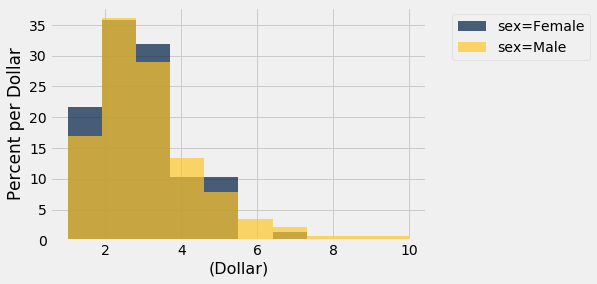

In [5]:
tips.hist('tip', unit="Dollar", group='sex')

*The histogram reveals the cause for the mean imbalance: although about the same number of men and women tip between \$0 and \$5, significantly more men tip above \$6.*

**b.**	Repeat part a, but broken down by `time`. 

In [6]:
means = tips.select('time', 'tip').group('time', np.mean)
means

time,tip mean
Dinner,3.10267
Lunch,2.72809


*After isolating the "time" and "Tip" columns, we group the data by mealtime and average the tips, finding that dinner tips average \$3.10 tips while lunch tips average \$2.73.*

C:\Users\C20Jefferson.Sesler\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


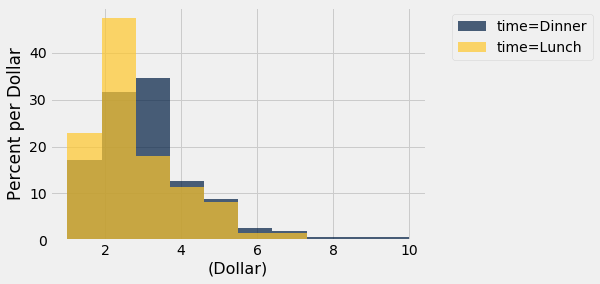

In [7]:
tips.hist('tip', unit="Dollar", group='time')

*The histogram confirms what the means told us: lunchtime tips are weighted towards a lower value than dinnertime tips, representing a larger trend of dinner tips being larger than lunch tips.*

**2)**	Create a function called `weekday_to_num`. This function inputs a string denoting day of the week (Mon, Tues, Wed, Thur, Fri, Sat, Sun), and returns a number (Mon = 1, Tues = 2, … Sun = 7). 

In [8]:
def weekday_to_num(dayString):
    ''' Given a string containing the abbreviation for a day of the week, returns number of day in week.
    >>> weekday_to_num('Monday')
    1
    >>> weekday_to_num('Sun')
    7
    Input must be a single string and not a list or array!
    '''
    dayList = ['day', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
    return dayList.index(dayString)

*The weekday_to_num function defines a list of the abbreviations for the days of the week in order, then searches for the given string in that list, returning the index of the string.*

**3)**	Apply this function to the `day` column of `tips` and include the result as a new column in `tips`, called `weekday_num`. 

In [9]:
tips = tips.with_column('weekday_num', tips.apply(weekday_to_num, 'day'))
tips

total_bill,tip,sex,smoker,day,time,size,weekday_num
16.99,1.01,Female,No,Sun,Dinner,2,7
10.34,1.66,Male,No,Sun,Dinner,3,7
21.01,3.5,Male,No,Sun,Dinner,3,7
23.68,3.31,Male,No,Sun,Dinner,2,7
24.59,3.61,Female,No,Sun,Dinner,4,7
25.29,4.71,Male,No,Sun,Dinner,4,7
8.77,2,Male,No,Sun,Dinner,2,7
26.88,3.12,Male,No,Sun,Dinner,4,7
15.04,1.96,Male,No,Sun,Dinner,2,7
14.78,3.23,Male,No,Sun,Dinner,2,7


*Using .apply to process the days into weekday numbers, we append the result to the end of the table.*

**4)**	Create a function called `est_tip`. The goal of this function is to predict tip amount based on the value of the bill (`total_bill`). To do this, we will look at “nearby” values (i.e. `tip`, where the value of `total_bill` is near the value of interest.) For example, if we want to predict the tip for total bill value of \$20, we will simply look at all total bills near \$20 and average the tip amount. The input of `est_tip` should be the total bill amount and the window, or the difference in total bill we would consider “nearby”. For example, for a window of \$1, we will look at all bills totaling \$19 thru \$21. The output of this function will be the predicted tip amount. 

In [10]:
def est_tip(damage, nearness=1):
    ''' Returns the average tip for all bills within nearness of damage'''
    return np.average( tips.where('total_bill', are.between_or_equal_to(damage-nearness, damage+nearness)).column('tip') )
    # Returns average of entries where total is within 'nearness' limits of 'damage', taking the column of tips

**5)**	Apply this function to the `total_bill` column of `tips` and include the result as a new column in `tips`. Build a scatterplot showing predicted tip amount overlaid with actual tip amount. 

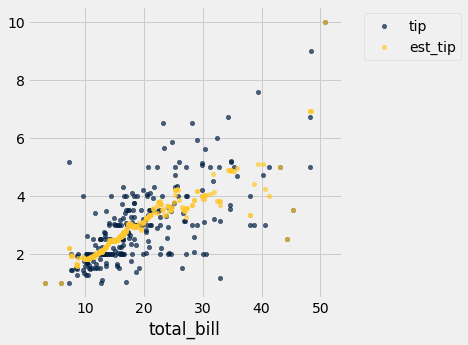

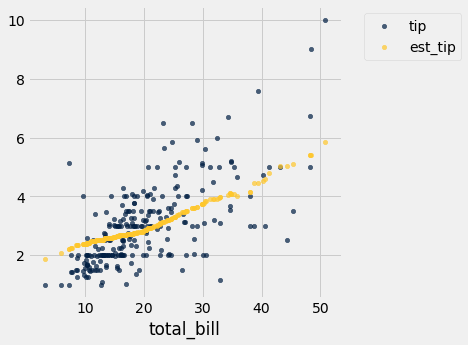

In [11]:
tips = tips.with_column('est_tip', tips.apply(est_tip, 'total_bill'))
alsoTips = tips.with_column('est_tip', tips.apply(lambda x: est_tip(x, 10), 'total_bill'))
#tips
tips.select('total_bill', 'tip', 'est_tip').scatter('total_bill')
alsoTips.select('total_bill', 'tip', 'est_tip').scatter('total_bill')

*At smaller total bills where data is plentiful, `est_tip` does a good job approximating the average expected tip. Unfortunately, at larger total bills with more disparate and less data, the estimation fluctuates wildly and does not converge to a line without a larger window size*